# *Aufgabe: kNN und Data Preprocessing*

### Aufgabe 1. kNN

0. Imports

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import os

1. Lesen von Data und Train/Test split

In [2]:
data = pd.read_csv(os.path.join("..", "..", "..", "data", "mpg.csv"))
data.head()
x_train, x_test, y_train, y_test = train_test_split(data.drop(["mpg"], axis=1), data["mpg"])
print('X Train: {}'.format(x_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(x_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (298, 7)
Y Train: (298,)
X Test: (100, 7)
Y Test: (100,)


2. "Train" the kNN "model" for differnt k's:

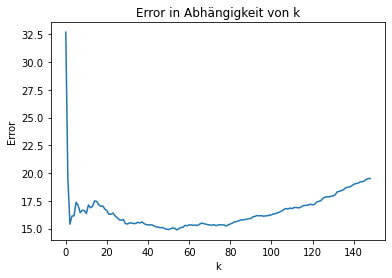

In [3]:
error = []
for i in range(1, 150):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    error.append(mse(predicted, y_test))
    
plt.title("Error in Abhängigkeit von k")
plt.plot(error)
plt.xlabel("k")
plt.ylabel("Error")
plt.show()

### Aufgabe 2. Preprocessing

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import trange
from sklearn.metrics import accuracy_score

1. Data auslesen

In [5]:
census = pd.read_csv(os.path.join("..", "..", "..", "data", "census.csv"))
census = census.drop(['occupation', 'relationship', 'capital-gain', 'capital-loss', 'native-country'], axis=1)
census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,target
0,39,State-gov,Bachelors,Never-married,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Black,Female,40,<=50K


2. Imputing fehlender Werte:

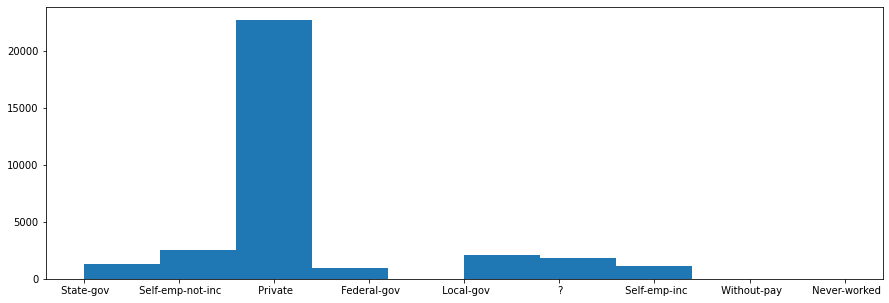

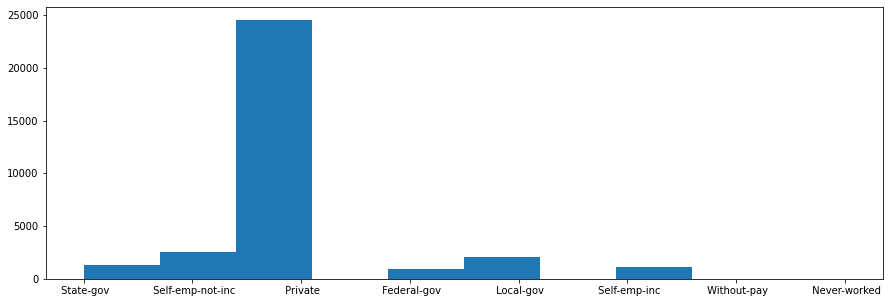

In [6]:
# Es gibt 1 Feature mit missing Values: 'workclass': 1836 Instanzen

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(census['workclass'])

imp_most_frequent = SimpleImputer(missing_values=' ?', strategy='most_frequent')
census['workclass'] = imp_most_frequent.fit_transform(census['workclass'].to_numpy().reshape(-1,1))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(census['workclass'])
plt.show()

3. Encoding kategorischer Werte:

In [7]:
# Die binären Features sex und target können per Hand encoded werden:

# SEX: Male: 1, Female: 0
census["sex"] = census["sex"].replace({' Male': 1, ' Female': 0})

# TARGET: >50K: 1, <=50K: 0 
census["target"] = census["target"].replace({' >50K': 1, ' <=50K': 0})

to_encode = ['workclass', 'education', 'marital-status', 'race']
for feature in to_encode:
    one_hot = pd.get_dummies(census[feature], drop_first=True)
    census = census.join(one_hot)
    census.pop(feature)

    
census.shape

(32561, 36)

4. Normalize the features

In [8]:
# Vorerst muss train/test Split gemacht werden

x_train, x_test, y_train, y_test = train_test_split(census.drop(["target"],axis=1), census["target"])
print('X Train: {}'.format(x_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(x_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (24420, 35)
Y Train: (24420,)
X Test: (8141, 35)
Y Test: (8141,)


In [9]:
# Age und hours-per-week sollten normalisiert werden.
minmax = MinMaxScaler()

x_train['age'] = minmax.fit_transform(x_train['age'].to_numpy().reshape(-1,1))
x_train['hours-per-week'] = minmax.fit_transform(x_train['hours-per-week'].to_numpy().reshape(-1,1))
print(x_train.head())

x_test['age'] = minmax.fit_transform(x_test['age'].to_numpy().reshape(-1,1))
x_test['hours-per-week'] = minmax.fit_transform(x_test['hours-per-week'].to_numpy().reshape(-1,1))

x_test.head()

            age  sex  hours-per-week   Local-gov   Never-worked   Private  \
2960   0.082192    1        0.500000           0              0         1   
6964   0.164384    1        0.602041           0              0         1   
8955   0.178082    0        0.551020           0              0         0   
14984  0.082192    0        0.397959           0              0         1   
25934  0.410959    0        0.397959           0              0         1   

        Self-emp-inc   Self-emp-not-inc   State-gov   Without-pay  ...  \
2960               0                  0           0             0  ...   
6964               0                  0           0             0  ...   
8955               0                  1           0             0  ...   
14984              0                  0           0             0  ...   
25934              0                  0           0             0  ...   

        Married-AF-spouse   Married-civ-spouse   Married-spouse-absent  \
2960              

,age,sex,hours-per-week,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,...,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Asian-Pac-Islander,Black,Other,White
25046,0.150685,1,0.397959,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
14225,0.342466,1,0.500000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
21742,0.219178,1,0.551020,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
27164,0.452055,1,0.653061,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
24570,0.232877,0,0.346939,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


5. Predict with kNN

  0%|          | 0/19 [00:00<?, ?it/s]

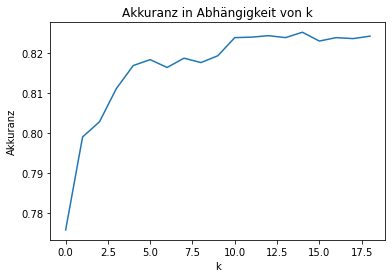

In [10]:
scores = []
for i in trange(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    scores.append(accuracy_score(predicted.reshape(-1,1), y_test.to_numpy().reshape(-1,1)))

plt.title("Akkuranz in Abhängigkeit von k")
plt.plot(scores)
plt.xlabel("k")
plt.ylabel("Akkuranz")
plt.show()

In [11]:
scores = []
for i in trange(1, 10000, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predicted = knn.predict(x_test)
    scores.append(accuracy_score(predicted.reshape(-1,1), y_test.to_numpy().reshape(-1,1)))

plt.title("Akkuranz in Abhängigkeit von k")
plt.plot(scores)
plt.xlabel("k")
plt.ylabel("Akkuranz")
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Arkhi\PycharmProjects\Limebit\full-stack-machine-learning\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Arkhi\AppData\Local\Temp/ipykernel_15336/2590134339.py", line 5, in <module>
    predicted = knn.predict(x_test)
  File "C:\Users\Arkhi\PycharmProjects\Limebit\full-stack-machine-learning\venv\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "C:\Users\Arkhi\PycharmProjects\Limebit\full-stack-machine-learning\venv\lib\site-packages\sklearn\neighbors\_base.py", line 749, in kneighbors
    chunked_results = list(
  File "C:\Users\Arkhi\PycharmProjects\Limebit\full-stack-machine-learning\venv\lib\site-packages\sklearn\metrics\pairwise.py", line 1712, in pairwise_distances_chunked
    D_chunk = pairwise_distances(X_chunk, Y, metric=metric, n_jobs=n_job

TypeError: object of type 'NoneType' has no len()